# URTI TRA DUE CARRELLI

ASSUMENTO CHE L'URTO DEI CARRELLI SIA COMPLETAMENTE ELASTICO dall'equazione della conservazione della quantità di moto e dell'energia cinetica si ricava:

$v^R_f = (\frac{m_R - m_B}{m_R + m_B})v^R_i + (\frac{2m_B}{m_R + m_B})v^B_i$

$v^B_f = (\frac{2m_R}{m_B+m_R})v^R_i + (\frac{m_B - m_R}{m_R + m_B})v^B_i$

Posizioniamo il carrello rosso fermo sulla pedana ($v_i^R = 0$) e muoviamo il carrello blu.
Abbiamo osservato che il carrello blu, avendo massa simile al carrello rosso, dopo l'urto risulta avere velocità trascurabile ($v_f^B = 0$)

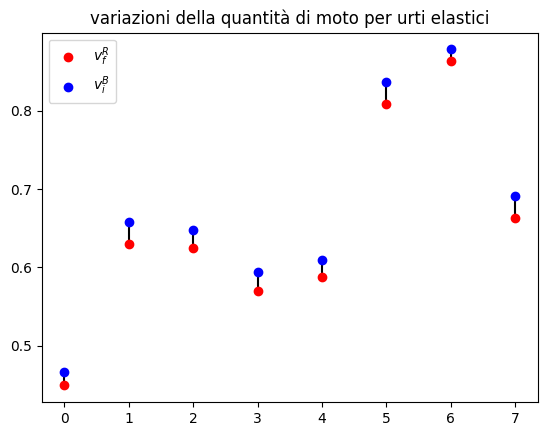

In [35]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from interpolazione3 import final_val, probability_under_norm

PATH = os.path.abspath('')
FILE = PATH + '/../CSV/urti_elastici.csv'
fr = pd.read_csv(FILE)

viB = np.array(fr['viB'])
vfR = np.array(fr['vfR'])


fig, ax = plt.subplots()
plt.title('variazioni della quantità di moto per urti elastici')
for i in range(0,len(viB)):
    ax.plot([i,i],[viB[i],vfR[i]],color='black')
    b = ax.scatter(i,viB[i],color='blue',zorder=2)
    r = ax.scatter(i,vfR[i],color='red',zorder=2)

ax.legend((r,b),('$v_f^R$','$v_i^B$'),loc='upper left')

deltaP = np.array(fr['deltaP'])
deltaP_med = np.mean(deltaP)
deltaP_std = np.std(deltaP)

il grafico sopra rappresentato vuole mostrare il range di velocità alle quali sono avvenuti gli urti e la variazione della quantità di moto

### verifica accordo con $\Delta p = 0$

per verificare che l'assunzione $\Delta p = 0$ sia corretta immaginiamo che la funzione  $\Delta p(v)$ debba essere costante con A=0, B=0.
Verifichiamo con un interpolazione che B=0,A=0 stiano entro $2\sigma$

In [36]:
from interpolazione3 import RettaInterpolata

# plt.title("$\Delta p(v) = 0$")
# plt.xlabel('v (m/s)')
# plt.ylabel('$\Delta p (Kg m/s)$')
# plt.errorbar(viB,deltaP,fmt='o',color='red')
# plt.plot(r.x_best,r.y_best)
# plt.show()

r = RettaInterpolata(viB,deltaP)

d_A = np.round(np.abs(0-r.A)/r.sigmaA,1) # distanza in sigma da 0 di A
d_B = np.round(np.abs(0-r.B)/r.sigmaB,1) # distanza in sigma da 0 in B

print('Distanza in sigma di A da 0: ',d_A)
print('Distanza in sigma di B da 0: ',d_B)
if d_A <= 2 and d_B <=2:
    print('Accordo con DeltaP = 0 verificato')
print(r)

Distanza in sigma di A da 0:  1.8
Distanza in sigma di B da 0:  0.5
Accordo con DeltaP = 0 verificato

linearità A + BX
    
A: -0.006234841931714278 
B: 0.010240926892092357
sigmaA: 0.003460412945561406
sigmaB: 0.01873777841793092

sigmaY: 0.001776347546326475
chiquadro ridotto: -0.0011
df: 4.0
    



### verifica accordo $\Delta E_k = 0$

ripetiamo il medesimo procedimento per la verifica della conservazione dell'energia cinetica

Distanza in sigma di A da 0:  2.4
Distanza in sigma di B da 0:  0.6

linearità A + BX
    
A: -0.0026984313635642623 
B: -0.010712191749039188
sigmaA: 0.0011399936955521588
sigmaB: 0.016947837888865617

sigmaY: 0.0011093073938050343
chiquadro ridotto: -0.0005
df: 4.0
    



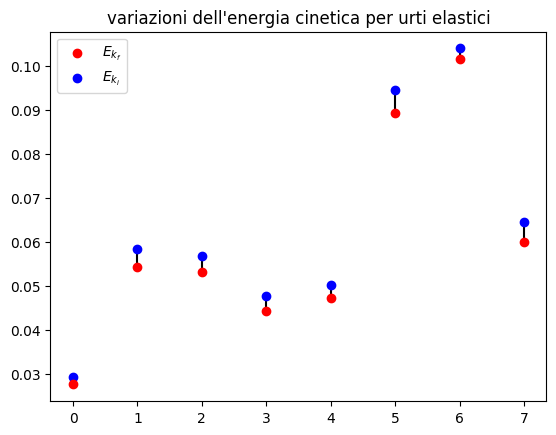

In [37]:
deltaEk = np.array(fr['deltaEk'])
Eki = np.array(fr['Eki'])
Ekf = np.array(fr['Ekf'])

fig, ax = plt.subplots()
plt.title('variazioni dell\'energia cinetica per urti elastici')
for i in range(0,len(Eki)):
    ax.plot([i,i],[Eki[i],Ekf[i]],color='black')
    b = ax.scatter(i,Eki[i],color='blue',zorder=2)
    r = ax.scatter(i,Ekf[i],color='red',zorder=2)

ax.legend((r,b),('$E_{k_f}$','$E_{k_i}$'),loc='upper left')

r = RettaInterpolata(Eki,deltaEk)

d_A = np.round(np.abs(0-r.A)/r.sigmaA,1) # distanza in sigma da 0 di A
d_B = np.round(np.abs(0-r.B)/r.sigmaB,1) # distanza in sigma da 0 in B

print('Distanza in sigma di A da 0: ',d_A)
print('Distanza in sigma di B da 0: ',d_B)
if d_A <= 2 and d_B <=2:
    print('Accordo con DeltaP = 0 verificato')
print(r)
